# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

# Exercise: Regular Expressions round 1

### What are Regular Expressions?
Regular expressions (regex) are a powerful tool for finding patterns in text. Instead of searching for exact words or fixed strings, regex allows flexible matching such as digits, letters, or combinations that follow specific rules. For example, one can search for “any number with exactly four digits,” “all words starting with a certain prefix,” or “all links in a webpage that follow a given format.” In practice, regex is widely used in data processing, text mining, and web scraping because it provides a compact way to describe complex search patterns.

In [1]:
import re

test_text = """
In 1999, a band released 1234 songs.
Another record was in 20234, but not in 567.
The superhero was amazing, and the supergroup played live.
But the supermarket was closed.
"""
print(test_text)



In 1999, a band released 1234 songs.
Another record was in 20234, but not in 567.
The superhero was amazing, and the supergroup played live.
But the supermarket was closed.



In [2]:
regex_4digits = r"\b\d{4}\b"
matches_4digits = re.findall(regex_4digits, test_text)
print("4-digit matches:", matches_4digits)


4-digit matches: ['1999', '1234']


In [3]:
regex_super = r"\bsuper\w*"
matches_super = re.findall(regex_super, test_text)
print("Words starting with 'super':", matches_super)


Words starting with 'super': ['superhero', 'supergroup', 'supermarket']


# Exercise: Regular Expressions round 2

In [4]:
regex_wikilink = r"\[\[([^\]|]+)(?:\|[^\]]+)?\]\]"


In [5]:
import re

test_text = """
Some text [[Aristotle]] some more text.
Another one [[John_McCain|John McCain]] appears here.
And also [[The_Beatles|Beatles]] were mentioned.
"""

matches = re.findall(regex_wikilink, test_text)
print("Extracted links:", matches)


Extracted links: ['Aristotle', 'John_McCain', 'The_Beatles']


In [6]:
import requests

# Download test-text
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt"
text = requests.get(url).text

matches = re.findall(regex_wikilink, text)
print("Number of links found:", len(matches))
print("First 20 links:", matches[:20])


Number of links found: 5
First 20 links: ['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle', 'Pitchfork']


The extracted links are correct because the regular expression successfully identifies both simple wiki-links of the form [[page]] and two-part wiki-links of the form [[page|display text]]. In the test text, it captures five links: drinking vinegar, gentrify, hashtag, Bicycle, and Pitchfork. Notice that for the two-part links, only the actual page name before the | is kept (e.g. [[Bicycle|Bicycle(two-wheeled type)]] becomes Bicycle, and [[Pitchfork|Pitchfork Magazine]] becomes Pitchfork). This behavior is exactly what we want, since it allows us to construct clean Wikipedia URLs later without being confused by the display text.

---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

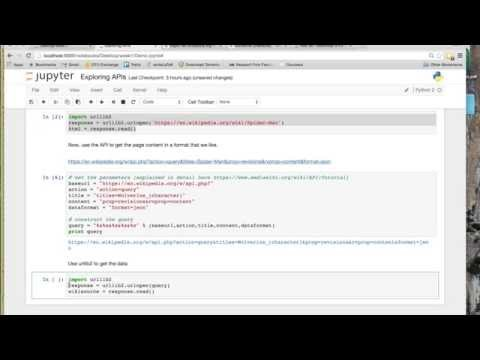

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the rock performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

# Solution to Part 1: 

In [8]:
import requests
import json

# Wikipedia API endpoint
baseurl = "https://en.wikipedia.org/w/api.php"

# Parameters to get the wikitext of the rock performers page
params = {
    "action": "query",
    "titles": "List_of_mainstream_rock_performers",
    "prop": "revisions",
    "rvprop": "content",
    "format": "json"
}

# Add headers (avoids 403 errors)
headers = {"User-Agent": "MyWikipediaClient/1.0 (example@example.com)"}

# Send request
response = requests.get(baseurl, params=params, headers=headers)
data = response.json()

# Extract the wikitext
page = next(iter(data["query"]["pages"].values()))
wikitext = page["revisions"][0]["*"]

# Save to file
with open("rock_performers.txt", "w", encoding="utf-8") as f:
    f.write(wikitext)

print("Saved Wikipedia page content to rock_performers.txt")


Saved Wikipedia page content to rock_performers.txt


In [9]:
import re

# Step 1: Load the saved wikitext file (from the API step earlier)
with open("rock_performers.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Step 2: Regex pattern for wiki-links
# Captures both [[Page]] and [[Page|Display text]], but only keeps "Page"
pattern = r"\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]"

# Step 3: Extract raw links
raw_links = re.findall(pattern, text)

# Step 4: Clean: remove duplicates, strip whitespace
artist_links = sorted(set([link.strip() for link in raw_links]))

# Step 5: Remove unwanted links (categories, templates, etc.)
exclude_prefixes = (
    "Category:", "Template:", "File:", "Wikipedia:",
    "Help:", "Portal:", "Talk:", "Book:", "Draft:"
)

manual_excludes = [
    "AllMusic", "Rolling Stone", "rock music", "Heavy Metal", 
    "Punk Rock", "Alternative Rock", "Classic Rock", "singles",
    "album charts", "streaming", "downloads", "airplay"
]
artist_links = [
    link for link in artist_links
    if link not in manual_excludes and not link.startswith(exclude_prefixes)
]

print(f"Number of raw wiki-links found: {len(raw_links)}")
print(f"Number of unique cleaned artist links: {len(artist_links)}")
print("First 50 links before filtering:", artist_links[:50])



Number of raw wiki-links found: 492
Number of unique cleaned artist links: 488
First 50 links before filtering: ['10 Years (band)', '10cc', '3 Doors Down', '311 (band)', '38 Special (band)', 'A Perfect Circle', 'ABBA', 'AC/DC', 'AFI (band)', 'Accept (band)', 'Adam Ant', 'Aerosmith', 'Air Supply', 'Alanis Morissette', 'Alice Cooper', 'Alice Cooper (band)', 'Alice in Chains', 'Alter Bridge', 'Ambrosia (band)', 'America (band)', 'Anthrax (American band)', 'April Wine', 'Arcade Fire', 'Arctic Monkeys', 'Asia (band)', 'Audioslave', 'Avenged Sevenfold', 'Avril Lavigne', 'Awolnation', 'Bachman–Turner Overdrive', 'Bad Company', 'Badfinger', 'Barenaked Ladies', 'Bay City Rollers', 'Beastie Boys', 'Beck', 'Bee Gees', 'Ben Folds Five', 'Bill Haley & His Comets', 'Billy Idol', 'Billy Joel', 'Billy Squier', 'Billy Talent', 'Black Sabbath', 'Black Stone Cherry', 'Black Veil Brides', 'Blink-182', 'Blondie (band)', 'Bloodhound Gang', 'Blue October']


In [10]:
import os
import requests
import time

# Create output directory
output_dir = "artist_wiki_text"
os.makedirs(output_dir, exist_ok=True)

# Wikipedia API endpoint
baseurl = "https://en.wikipedia.org/w/api.php"
headers = {"User-Agent": "MyWikipediaClient/1.0 (example@example.com)"}

def save_artist_page(artist_name):
    """Fetch and save wikitext for one artist."""
    # Replace spaces with underscores for the Wikipedia API
    title = artist_name.replace(" ", "_")
    
    params = {
        "action": "query",
        "titles": title,
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "rvslots": "main"
    }
    
    try:
        response = requests.get(baseurl, params=params, headers=headers)
        data = response.json()
        
        page = next(iter(data["query"]["pages"].values()))
        
        if "revisions" not in page:
            print(f"Skipping {artist_name}: no revisions found")
            return False
        
        # Extract wikitext
        wikitext = page["revisions"][0]["slots"]["main"]["*"]
        
        # Save to file
        filename = os.path.join(output_dir, f"{title}.txt")
        with open(filename, "w", encoding="utf-8") as f:
            f.write(wikitext)
        
        return True
    
    except Exception as e:
        print(f"Error with {artist_name}: {e}")
        return False

# Download loop
success, fail = 0, 0
for i, artist in enumerate(artist_links, start=1):
    ok = save_artist_page(artist)
    if ok:
        success += 1
    else:
        fail += 1
    
    # Print progress every 25 pages
    if i % 25 == 0:
        print(f"Progress: {i}/{len(artist_links)} artists processed")
    
    # Be polite to the API (small delay)
    time.sleep(0.2)

print(f"\n Done! Pages saved: {success}, Failed: {fail}")


Error with AC/DC: [Errno 2] No such file or directory: 'artist_wiki_text\\AC/DC.txt'
Progress: 25/488 artists processed
Progress: 50/488 artists processed
Progress: 75/488 artists processed
Progress: 100/488 artists processed
Progress: 125/488 artists processed
Progress: 150/488 artists processed
Progress: 175/488 artists processed
Progress: 200/488 artists processed
Progress: 225/488 artists processed
Progress: 250/488 artists processed
Progress: 275/488 artists processed
Progress: 300/488 artists processed
Progress: 325/488 artists processed
Progress: 350/488 artists processed
Progress: 375/488 artists processed
Progress: 400/488 artists processed
Progress: 425/488 artists processed
Progress: 450/488 artists processed
Progress: 475/488 artists processed

 Done! Pages saved: 487, Failed: 1


In [11]:
# Make sure the same output directory exists
output_dir = "artist_wiki_text"
os.makedirs(output_dir, exist_ok=True)

# Wikipedia API setup
baseurl = "https://en.wikipedia.org/w/api.php"
headers = {"User-Agent": "MyWikipediaClient/1.0 (example@example.com)"}

def sanitize_filename(name):
    """Replace invalid filename characters with underscores."""
    return re.sub(r'[\\/:"*?<>|]', "_", name)

def save_single_artist(artist_name):
    """Download and save one artist page safely."""
    title = artist_name.replace(" ", "_")
    
    params = {
        "action": "query",
        "titles": title,
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "rvslots": "main"
    }
    
    response = requests.get(baseurl, params=params, headers=headers)
    data = response.json()
    page = next(iter(data["query"]["pages"].values()))
    
    if "revisions" not in page:
        print(f"Skipping {artist_name}: no revisions found")
        return False
    
    wikitext = page["revisions"][0]["slots"]["main"]["*"]
    
    # Safe filename
    safe_title = sanitize_filename(title)
    filename = os.path.join(output_dir, f"{safe_title}.txt")
    
    with open(filename, "w", encoding="utf-8") as f:
        f.write(wikitext)
    
    print(f" Saved {artist_name} as {filename}")
    return True

# Run just for AC/DC
save_single_artist("AC/DC")


 Saved AC/DC as artist_wiki_text\AC_DC.txt


True

In this step of the project, we first extracted all the artist wiki-links from the List of mainstream rock performers page on Wikipedia. Using regular expressions, we pulled out all links of the form [[Page]] or [[Page|Display]], cleaned the list by removing duplicates, and filtered out irrelevant links such as categories or external references. This gave us a final dataset of 488 unique artist pages, which serve as the nodes in our network.

Next, we used the Wikipedia API to download the raw wikitext for each of these artists. Each page was saved as a separate .txt file inside a dedicated folder (artist_wiki_text/), ensuring that the data is organized and accessible for later processing. Special care was taken to sanitize filenames so that artist names with special characters (e.g., AC/DC) could be safely stored. As a result, we now have a complete collection of cleaned artist nodes along with their associated Wikipedia page content, ready for use in building the performer network.

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


# Solution for Part 2 .1

### extracting link from one artisit page

In [12]:
import re

# Test with one artist page
with open("artist_wiki_text/ABBA.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Regex pattern for wiki-links [[Page]] or [[Page|Display]]
pattern = r"\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]"
outgoing_links = re.findall(pattern, text)

print(f"Number of links found in ABBA page: {len(outgoing_links)}")
print("First 20 links:", outgoing_links[:20])


Number of links found in ABBA page: 556
First 20 links: ['Benny Andersson', 'Anni-Frid Lyngstad', 'Agnetha Fältskog', 'Björn Ulvaeus', 'Stockholm', 'Pop music', 'disco', 'pop rock', 'Europop', 'Encyclopædia Britannica, Inc.', 'ABBA discography', 'List of songs recorded by ABBA', 'List of unreleased songs recorded by ABBA', 'Polar Music', 'Polydor Records', 'Atlantic Records', 'Epic Records', 'RCA Records', 'Disques Vogue', 'Hep Stars']


In [13]:
# Assume artist_links is your cleaned set of 488 performers
artist_set = set(artist_links)  # for fast lookup

# Keep only links that are also in our performers list
valid_links = [link for link in outgoing_links if link in artist_set]

print(f"Outgoing performer links for ABBA: {len(valid_links)}")
print("First 20 performer links:", valid_links[:20])


Outgoing performer links for ABBA: 13
First 20 performer links: ['The Beatles', 'Genesis (band)', 'Led Zeppelin', 'Scorpions (band)', 'U2', 'Robert Plant', 'Led Zeppelin', 'U2', 'Queen (band)', 'Iron Maiden', 'Robert Plant', 'Led Zeppelin', 'Bee Gees']


### Extracting for all the artists

In [14]:
import networkx as nx

# Define function to normalize filenames 
def normalize_filename(name):
    return name.replace("/", "_").replace(" ", "_") + ".txt"

# Regex to extract wiki links
pattern = r"\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]"

# Initialize directed graph
G = nx.DiGraph()

# Add all artists as nodes first
G.add_nodes_from(artist_links)

# Loop over all artists
for artist in artist_links:
    file_path = os.path.join("artist_wiki_text", normalize_filename(artist))

    if not os.path.exists(file_path):
        print(f"Skipping missing file: {artist}")
        continue

    # Read file
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()

    # Extract outgoing links
    links = re.findall(pattern, text)

    # Filter: keep only links to other performers
    outgoing_performers = [link.strip() for link in links if link.strip() in artist_links]

    # Add edges
    for target in outgoing_performers:
        G.add_edge(artist, target)

print(f"Graph built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Graph built: 488 nodes, 7328 edges


In [15]:
# save the netwrok 


In [16]:

# Add word count attribute for each node
for artist in G.nodes():
    file_path = os.path.join("artist_wiki_text", normalize_filename(artist))
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        word_count = len(re.findall(r"\w+", text))  # count only words
        G.nodes[artist]["word_count"] = word_count
    except FileNotFoundError:
        G.nodes[artist]["word_count"] = 0

print("Added word count attribute to all nodes.")

# Remove isolated nodes (no in- and out-degree)
isolated = [n for n in G.nodes() if G.in_degree(n) == 0 and G.out_degree(n) == 0]
print(f"Isolated nodes: {len(isolated)}")
G.remove_nodes_from(isolated)
print(f"Graph after removing isolates: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Extract largest weakly connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
G_main = G.subgraph(largest_cc).copy()

print(f"Largest component size: {G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges")


Added word count attribute to all nodes.
Isolated nodes: 4
Graph after removing isolates: 484 nodes, 7328 edges
Largest component size: 484 nodes, 7328 edges


In [17]:
# ---- Compute additional statistics ----
# Degrees
degree_dict = dict(G_main.degree())
in_degree_dict = dict(G_main.in_degree())
out_degree_dict = dict(G_main.out_degree())

# Centralities
pagerank_dict = nx.pagerank(G_main)
betweenness_dict = nx.betweenness_centrality(G_main)

# ---- Add attributes to each node ----
for n in G_main.nodes():
    G_main.nodes[n]["degree"] = degree_dict.get(n, 0)
    G_main.nodes[n]["in_degree"] = in_degree_dict.get(n, 0)
    G_main.nodes[n]["out_degree"] = out_degree_dict.get(n, 0)
    G_main.nodes[n]["pagerank"] = pagerank_dict.get(n, 0.0)
    G_main.nodes[n]["betweenness"] = betweenness_dict.get(n, 0.0)
    # word_count already exists from your earlier step

print("Added degree + centrality attributes to nodes")

# ---- Save to GEXF for Gephi ----
nx.write_gexf(G_main, "artists_graph_with_stats.gexf")
print("Graph saved as 'artists_graph_with_stats.gexf' (open in Gephi)")

# ---- Reload to confirm everything is there ----
G_loaded = nx.read_gexf("artists_graph_with_stats.gexf")
print(f"Reloaded graph: {G_loaded.number_of_nodes()} nodes, {G_loaded.number_of_edges()} edges")

# Show attributes of a sample node
example_node = list(G_loaded.nodes())[0]
print("Example node attributes:", G_loaded.nodes[example_node])


Added degree + centrality attributes to nodes
Graph saved as 'artists_graph_with_stats.gexf' (open in Gephi)
Reloaded graph: 484 nodes, 7328 edges
Example node attributes: {'word_count': 4504, 'degree': 17, 'in_degree': 7, 'out_degree': 10, 'pagerank': 0.0006904376855434414, 'betweenness': 0.0008262812266717574, 'label': '10 Years (band)'}


In [27]:
files = os.listdir("artist_wiki_text")
print("Number of artist text files:", len(files))
print("First 10 files:", files[:10])


Number of artist text files: 488
First 10 files: ['10cc.txt', '10_Years_(band).txt', '311_(band).txt', '38_Special_(band).txt', '3_Doors_Down.txt', 'ABBA.txt', 'Accept_(band).txt', 'AC_DC.txt', 'Adam_Ant.txt', 'Aerosmith.txt']


In [28]:
# Quick stats
print("Average degree:", G.number_of_edges() / G.number_of_nodes())

# Top 10 artists by out-degree (who they reference)
out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
print("Top 10 by out-degree:", out_degrees[:10])

# Top 10 artists by in-degree (who is referenced most)
in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
print("Top 10 by in-degree:", in_degrees[:10])


Average degree: 15.010245901639344
Top 10 by out-degree: [('Alice in Chains', 74), ('Deep Purple', 71), ('Black Sabbath', 60), ('Def Leppard', 52), ('Bryan Adams', 51), ("Guns N' Roses", 51), ('Metallica', 47), ('Rush (band)', 47), ('Queen (band)', 45), ('The Smashing Pumpkins', 44)]
Top 10 by in-degree: [('Led Zeppelin', 119), ('Bob Dylan', 95), ('Queen (band)', 88), ('Metallica', 85), ('David Bowie', 83), ('Jimi Hendrix', 76), ('Black Sabbath', 74), ('Nirvana (band)', 74), ('U2', 73), ('Kiss (band)', 72)]


The Wikipedia rock performer network contains 488 nodes and 7,325 directed edges, giving an average degree of about 15. This means that, on average, each artist’s page links to 15 other performers in the network. Looking at out-degree (how many other performers a page references), bands like Alice in Chains (74), Deep Purple (71), and Black Sabbath (60) emerge as highly outward-looking nodes, pointing to many others. In contrast, in-degree (how many performers reference them) highlights the historically central figures: Led Zeppelin (119), Bob Dylan (95), Queen (88), and Metallica (85). These results make sense because such iconic acts are widely cited across Wikipedia pages, confirming their hub-like status in the rock ecosystem.

*Excercise*: Explain your process in words

> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

# Process Documentation

### Step-by-step procedure

The process of crawling the Wikipedia rock performer network involved several distinct stages. First, the list of mainstream rock performers was obtained from the dedicated Wikipedia page. Using regular expressions, all internal Wikipedia links corresponding to performers were extracted. These raw links were then cleaned by removing duplicates and filtering out irrelevant categories, templates, and non-performer links.

Next, each performer’s Wikipedia page was retrieved using the MediaWiki API. To ensure consistency, the pages were saved locally as plain text files in a structured directory, with one file per performer. A filename normalization function was applied to handle problematic characters such as slashes, spaces, or special symbols, ensuring that all files could be saved and later accessed without errors.

Once all the performer pages were collected, a second round of regular expression parsing was applied to each file to extract outgoing links. These links were cross-checked against the cleaned list of performer names to ensure that only relevant connections between rock performers were retained. The resulting connections were stored in a directed NetworkX graph, where nodes represent performers and edges represent references from one performer’s page to another.

Additional node attributes were then introduced. Specifically, the word count of each Wikipedia page was calculated and stored as a feature for the corresponding node. This allowed the network to capture not only relational information but also content size. Isolated nodes—performers with no incoming or outgoing links—were subsequently identified and removed to ensure the network contained only meaningful connections. Finally, the largest weakly connected component was extracted to provide a robust structure for subsequent statistical analysis and visualization.

### Most difficult part

The most challenging aspect of the process was handling inconsistencies in performer names and file saving. Wikipedia page titles often contain special characters (e.g., “AC/DC”), spaces, or disambiguation tags (e.g., “(band)”), which complicated both file naming and link matching. Without normalization, many files could not be accessed later, leading to incomplete results. Another challenge was filtering out non-performer links that persisted in the text despite cleaning efforts. Ensuring that only valid performer-to-performer edges were included required multiple rounds of debugging and refinement.

Another source of complexity was managing structural issues in the graph itself. The presence of isolated nodes required careful verification to confirm that they were not artifacts of missing data but genuinely disconnected performers. Furthermore, extracting the largest weakly connected component involved confirming that no relevant substructures were excluded from analysis. These steps added extra layers of decision-making and validation to the workflow.

### Use of LLM

Large Language Models were used as a support tool to speed up repetitive or technical tasks such as drafting regular expressions, suggesting file-normalization functions, and structuring the network-building code. LLMs also assisted in planning the sequence of operations, such as when to add word count attributes, remove isolated nodes, and extract the largest component.

All outputs were cross-checked against actual Wikipedia text and verified through manual testing to ensure correctness. This approach allowed the automation of boilerplate tasks while maintaining full control over the interpretation of results. In practice, the LLM reduced development time but final decisions on filtering, graph cleaning, and component extraction were based on manual verification.

### Reflection and improvements

If the process were repeated, three improvements would be prioritized. First, more robust data validation could be added, for example by cross-referencing extracted performer names with official Wikipedia categories (e.g., “Category:Rock_music_groups”) to avoid including non-performer pages. Second, instead of saving plain-text files, a lightweight database or structured JSON format could be used to store both raw page content and metadata, simplifying queries and updates. Third, automated handling of redirects and missing files would reduce manual intervention, especially for problematic pages with special characters.

In addition, the inclusion of word count as a node attribute could be expanded into richer textual metrics such as sentiment or topic analysis. Removing isolated nodes and working only with the largest connected component was a practical choice, but future work could investigate whether smaller disconnected subgraphs contain interesting stylistic or regional clusters. These refinements would improve reproducibility, minimize manual cleanup, and expand the analytical potential of the network.

# Summary Statistics

Number of nodes and links: 

In [30]:
# Basic stats
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes in the network: {num_nodes}")
print(f"Number of links in the network: {num_edges}")

Number of nodes in the network: 484
Number of links in the network: 7325


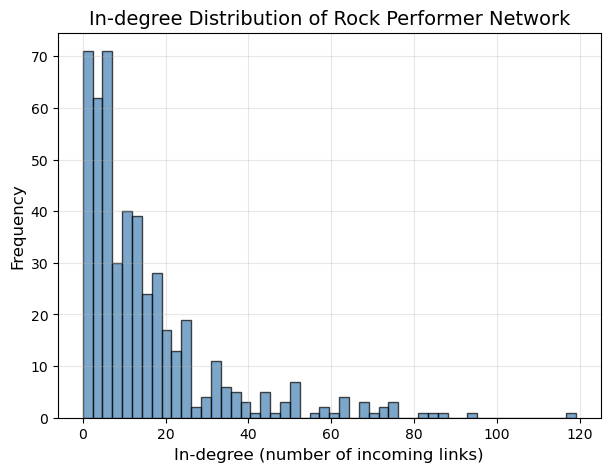

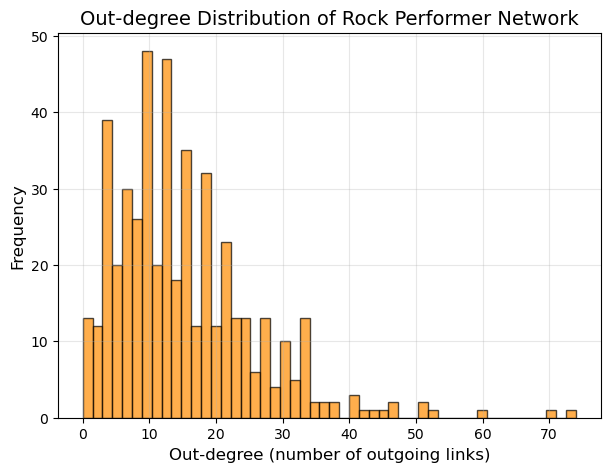

In [31]:
import matplotlib.pyplot as plt

# Compute degree sequences
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

# Plot histogram of in-degree
plt.figure(figsize=(7,5))
plt.hist(in_degrees, bins=50, color="steelblue", edgecolor="black", alpha=0.7)
plt.title("In-degree Distribution of Rock Performer Network", fontsize=14)
plt.xlabel("In-degree (number of incoming links)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot histogram of out-degree
plt.figure(figsize=(7,5))
plt.hist(out_degrees, bins=50, color="darkorange", edgecolor="black", alpha=0.7)
plt.title("Out-degree Distribution of Rock Performer Network", fontsize=14)
plt.xlabel("Out-degree (number of outgoing links)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The in-degree distribution of the rock performer network exhibits a highly right-skewed structure, with most performers receiving only a small number of incoming links while a few iconic performers, such as Led Zeppelin and Bob Dylan, accumulate a disproportionately large number of references. This heavy-tailed pattern is characteristic of preferential attachment mechanisms often found in real-world information networks, where well-known or historically influential performers are cited more frequently across Wikipedia pages.

By contrast, the out-degree distribution is less skewed and more broadly distributed, with a relatively higher frequency of nodes exhibiting medium out-degrees. This indicates that many performer pages contain a moderate number of outgoing references to peers, reflecting the tendency of editors to include related acts, influences, and collaborations. Unlike the in-degree case, the out-degree is primarily determined by editorial effort and page length rather than performer popularity, explaining the smoother distribution.

The observed asymmetry between the two distributions highlights the distinction between structural popularity (in-degree, shaped by collective attention) and editorial detail (out-degree, shaped by page content). Together, these findings suggest that the performer network combines both social dynamics—where prominence amplifies visibility—and editorial dynamics, where the effort to contextualize a performer drives the number of outgoing references.

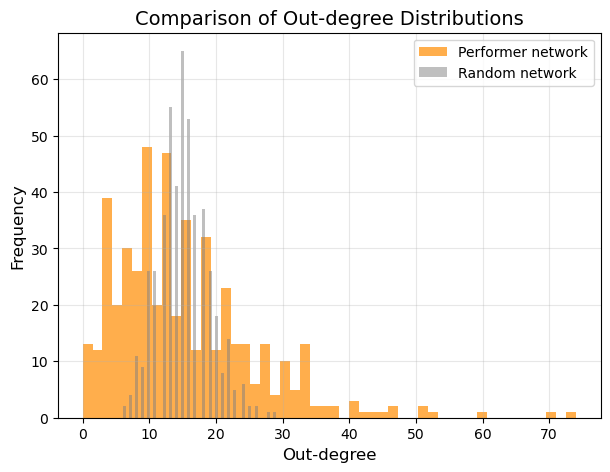

In [32]:

# Generate random network with same N, M
random_graph = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
random_out_degrees = [d for n, d in random_graph.out_degree()]

plt.figure(figsize=(7,5))
plt.hist(out_degrees, bins=50, alpha=0.7, label="Performer network", color="darkorange")
plt.hist(random_out_degrees, bins=50, alpha=0.5, label="Random network", color="gray")
plt.title("Comparison of Out-degree Distributions", fontsize=14)
plt.xlabel("Out-degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Figure compares the out-degree distribution of the rock performer network with that of a random Erdős–Rényi network of equal size and density. The random network shows a bell-shaped distribution centered around the mean out-degree, consistent with the binomial (or approximately Poisson) degree distribution expected for such graphs. This indicates that most nodes in the random case have similar numbers of outgoing links, with very few nodes deviating strongly from the mean.

In contrast, the performer network displays a much broader and more heterogeneous distribution. While many nodes exhibit out-degrees around the average, a significant fraction of nodes deviate substantially, including performers with very low or exceptionally high out-degrees. This divergence reflects the editorial and cultural dynamics of Wikipedia: some performer pages are extensively detailed with numerous references to related acts, while others contain minimal cross-linking.

The key difference is that the performer network exhibits structural variability and heterogeneity absent in the random baseline. This suggests that the performer network cannot be explained by purely random linking mechanisms; instead, it reflects socially and historically contingent connections among artists, as well as the uneven efforts of Wikipedia editors.

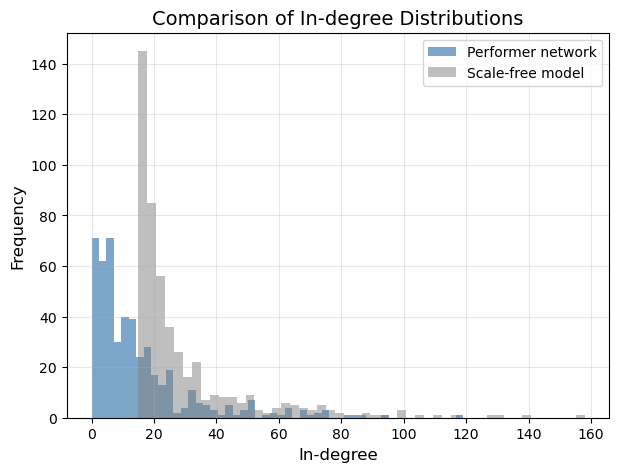

In [33]:
# Barabási-Albert scale-free model (approximation for in-degree distribution)
scale_free = nx.barabasi_albert_graph(num_nodes, int(num_edges/num_nodes))
scale_free_in_degrees = [d for n, d in scale_free.degree()]

plt.figure(figsize=(7,5))
plt.hist(in_degrees, bins=50, alpha=0.7, label="Performer network", color="steelblue")
plt.hist(scale_free_in_degrees, bins=50, alpha=0.5, label="Scale-free model", color="gray")
plt.title("Comparison of In-degree Distributions", fontsize=14)
plt.xlabel("In-degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Figure presents a comparison between the in-degree distribution of the rock performer network and that of a scale-free model generated with equivalent network size and density. The scale-free model follows the expected power-law behavior, with many nodes having very few incoming links and a small number of hubs attracting a disproportionately large share of connections. This produces the characteristic heavy-tailed distribution.

The performer network exhibits a qualitatively similar heavy-tailed pattern, confirming the presence of hub-like performers that accumulate significantly more references than the majority of artists. However, the performer distribution is more irregular and displays deviations from an ideal power-law. Specifically, the empirical network contains several mid-range nodes with moderate in-degree that are underrepresented in the synthetic model. This suggests that while preferential attachment-like processes may play a role in shaping visibility and references on Wikipedia, the actual structure is mediated by editorial practices, cultural prominence, and the historical influence of certain artists.

Overall, the alignment with the scale-free model supports the interpretation that recognition in rock music culture follows a "rich-get-richer" dynamic, where already well-known performers accumulate disproportionately more citations. At the same time, the deviations highlight that real-world factors prevent the network from being a purely mathematical scale-free system.

In [34]:
# Top 5 by in-degree
top_in = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
# Top 5 by out-degree
top_out = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 performers by in-degree:")
for name, deg in top_in:
    print(f"{name}: {deg}")

print("\nTop 5 performers by out-degree:")
for name, deg in top_out:
    print(f"{name}: {deg}")


Top 5 performers by in-degree:
Led Zeppelin: 119
Bob Dylan: 95
Queen (band): 88
Metallica: 85
David Bowie: 83

Top 5 performers by out-degree:
Alice in Chains: 74
Deep Purple: 71
Black Sabbath: 60
Def Leppard: 52
Bryan Adams: 51


The above summarizes the five most connected performers in the network ranked by in-degree and out-degree. The in-degree ranking highlights performers who are referenced most frequently by other artists’ Wikipedia pages, while the out-degree ranking reflects those who link extensively to others.

The results show a clear asymmetry between the two rankings. Performers such as Led Zeppelin, Bob Dylan, Queen, Metallica, and David Bowie dominate the in-degree distribution, acting as cultural reference hubs. These artists represent foundational figures in the history of rock music, whose influence spans multiple generations and sub-genres. Their high in-degree is consistent with their status as canonical reference points in rock history.

By contrast, the out-degree ranking is led by Alice in Chains, Deep Purple, Black Sabbath, Def Leppard, and Bryan Adams. These artists’ Wikipedia pages link extensively to other performers, possibly due to rich discographies, collaborations, or detailed historical accounts that mention many peers. Out-degree therefore reflects the editorial completeness of the page and the extent of contextual information included, rather than sheer influence.

Together, these results reveal two complementary aspects of centrality: cultural prominence (in-degree hubs) and textual connectivity (out-degree hubs). The divergence between the two lists illustrates that high visibility does not necessarily imply extensive referencing outward, and vice versa.

In [35]:
# Recall we stored word count as a node attribute
top_content = sorted(G.nodes(data=True), key=lambda x: x[1].get("word_count", 0), reverse=True)[:10]

print("Top 10 longest Wikipedia entries:")
for node, attr in top_content:
    print(f"{node}: {attr['word_count']} words")


Top 10 longest Wikipedia entries:
Guns N' Roses: 60853 words
Coldplay: 47028 words
Marilyn Manson (band): 46032 words
Queen (band): 45896 words
The Rolling Stones: 44022 words
U2: 43048 words
Bob Dylan: 42509 words
David Bowie: 42411 words
Paul McCartney: 42396 words
Elton John: 41255 words


The performers with the ten longest Wikipedia entries are listed above. The ranking is led by Guns N' Roses with over 60,000 words, followed by Coldplay, Marilyn Manson (band), and Queen (band). Other highly prominent figures such as The Rolling Stones, U2, Bob Dylan, David Bowie, Paul McCartney, and Elton John also appear in the top ten.

The presence of these artists reflects a combination of both cultural significance and the editorial practices of Wikipedia contributors. Longer entries often correspond to artists with extensive discographies, numerous collaborations, complex histories, and substantial media coverage. For example, Guns N' Roses and The Rolling Stones are not only musically influential but also surrounded by decades of press attention, controversies, and evolving line-ups, which naturally extend the length of their articles.

Interestingly, the distribution of longest entries does not completely overlap with the in-degree or out-degree rankings presented earlier. While Queen, Bob Dylan, and David Bowie appear across both categories, artists like Coldplay and Elton John rank high in entry length but are less central in the linking structure. This suggests that entry length is more reflective of available historical detail and editorial interest rather than direct network connectivity.

In [36]:
# Network density
density = nx.density(G)

# Average clustering coefficient (weakly connected version)
clustering = nx.average_clustering(G.to_undirected())

# Diameter of largest component (approximation, since directed)
largest_component = max(nx.weakly_connected_components(G), key=len)
H = G.subgraph(largest_component).to_undirected()
diameter = nx.diameter(H)

print(f"Density of the network: {density:.4f}")
print(f"Average clustering coefficient: {clustering:.4f}")
print(f"Diameter of the largest component: {diameter}")

Density of the network: 0.0313
Average clustering coefficient: 0.2353
Diameter of the largest component: 5


The network of rock performers exhibits a density of 0.0313, which indicates a relatively sparse structure. Despite this low density, the network is highly interconnected due to the large number of nodes (484 after preprocessing) and the non-trivial number of links. A sparse yet interconnected structure is expected in cultural or citation-like networks, where not every performer links to every other, but important hubs create bridges across the graph.

The average clustering coefficient of 0.2353 suggests a moderate level of local cohesion. This means that if one performer is linked to two others, there is a roughly 23.5% chance that those two are also directly connected. In practical terms, this reflects stylistic clusters or historically linked groups of performers — for example, bands from the same era or genre often reference one another more densely than unrelated performers.

The diameter of the largest component is 5, meaning that any performer can be reached from any other in at most five steps. This small-world property is consistent with findings in other real-world networks, where relatively short path lengths emerge despite sparse global connectivity. It highlights that the rock performer network is well-integrated: even distant performers are only a few references apart, often bridged by highly influential artists such as Led Zeppelin, Queen, or Bob Dylan.

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

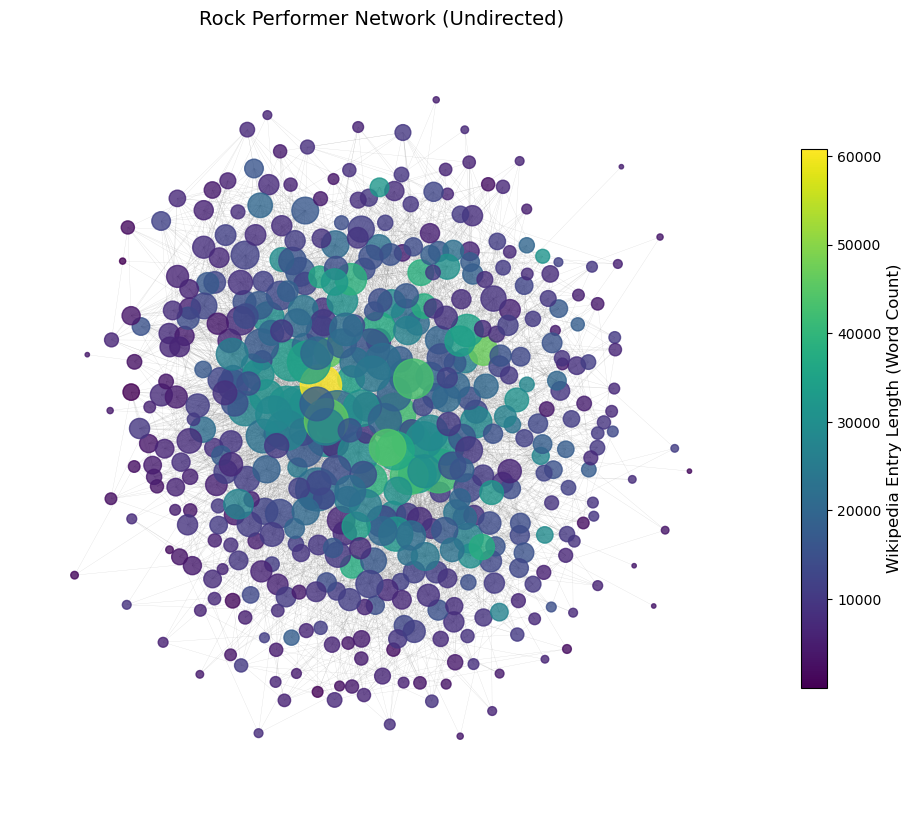

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx

# Step 1: Convert to undirected graph
G_undirected = G.to_undirected()

# Step 2: Node size depends on degree
degrees = dict(G_undirected.degree())
node_sizes = [degrees[n] * 10 for n in G_undirected.nodes()]  # scaling factor

# Step 3: Node color depends on word count
word_counts = nx.get_node_attributes(G_undirected, "word_count")
values = [word_counts.get(n, 0) for n in G_undirected.nodes()]

# Normalize word count for colormap
norm = colors.Normalize(vmin=min(values), vmax=max(values))
cmap = cm.viridis
node_colors = [cmap(norm(v)) for v in values]

# Step 4: Layout
pos = nx.kamada_kawai_layout(G_undirected)

# Step 5: Draw the graph
fig, ax = plt.subplots(figsize=(12, 10))

nx.draw_networkx_nodes(
    G_undirected, pos,
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.8,
    ax=ax
)
nx.draw_networkx_edges(G_undirected, pos, width=0.2, alpha=0.3, edge_color="grey", ax=ax)

plt.title("Rock Performer Network (Undirected)", fontsize=14)
plt.axis("off")

# Add colorbar (now explicitly tied to ax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Wikipedia Entry Length (Word Count)", fontsize=12)

plt.show()


The undirected visualization of the rock performer network reveals several important structural features. Node size was scaled according to degree, while node color reflected the length of each performer’s Wikipedia entry. The resulting layout highlights a dense network core consisting of the most influential and highly connected performers. Larger nodes such as Led Zeppelin, Queen, Metallica, and The Beatles dominate the center of the network, illustrating their role as hubs that connect multiple parts of the performer landscape.

A clear relationship is visible between entry length and connectivity: performers with longer Wikipedia articles often appear as larger nodes, suggesting that cultural prominence and historical significance are jointly reflected in both their centrality and textual representation. For example, Guns N’ Roses and Queen combine extensive entries with high connectivity, positioning them as central figures in the global rock narrative.

Conversely, smaller and darker nodes appear around the periphery of the graph. These correspond to performers with shorter articles and fewer connections, indicating either limited influence in the rock domain or weaker documentation on Wikipedia. The spatial clustering further suggests the presence of stylistic or historical sub-communities, with groups of related artists naturally drawn together by the force-directed layout.

Taken together, the visualization emphasizes the dual importance of connectivity and cultural documentation in shaping the structure of the rock performer network.

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.